# Product Analysis
This notebook I will be performing exploration and an analysis in regards to the products available from the DataSet. I also want to clean the data to be exported and used in another notebook.

Question to Explore:
* Most purchased product
* Which Category has the most products
* Which Category generates the most revenue
* Which Product Generates the most revenue

In [1]:
# Libraries Used
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")

In [2]:
# Import Product Related Data 
products = pd.read_csv('../data/raw/olist_products_dataset.csv')
translation = pd.read_csv('../data/raw/product_category_name_translation.csv')
orders = pd.read_csv('../data/raw/olist_order_items_dataset.csv')

## Quick Exploration of Each Individual Table

### Products

In [3]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Notice Some rows are missing the Category. I want to fill these missing values with 'Unknown' so they are still counted.

In [5]:
print(f"There are {products.product_id.nunique()} unique products listed.") # Each row in products is unique

There are 32951 unique products listed.


### Orders

In [6]:
orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
orders.info() #no missing entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [8]:
print(f"There are {orders.order_id.nunique()} orders for {orders.product_id.nunique()} different products") # Each product appears in an order

There are 98666 orders for 32951 different products


Notice that there are less unique `order_id` values than total rows. This is because some orders contain multiple items.

### Translations

In [9]:
translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [11]:
# Check how many categories are translated
print(f"We have {translation.product_category_name.nunique()} categories with translations, out of {products.product_category_name.nunique()} product categories") #missing 2 categories' translations

We have 71 categories with translations, out of 73 product categories


## Translating Product Category to English
Using the `translation` DataFrame, I want to map a new column on to `products` that has the english translation for the product category. This will make it easier to understand in future analysis.

In [12]:
# Rename the columns for ease of use
products.rename(columns={'product_category_name':'category'}, inplace=True)
translation.rename(columns={'product_category_name':'category','product_category_name_english':'translation'}, inplace=True)

Lets use the translation DF to map to a new english column. We need to create a dictionary first from the `translation` DataFrame that has `category` keys and `translation` values

In [13]:
# Create a dictionary to use for mapping
map_translation = dict(zip(translation.category, translation.translation))

# make new column using the map
products['category_en'] = products['category'].map(map_translation).fillna(products['category']) # fills missing translation with original

In [14]:
# Checking it worked as intdended
products.head()

,product_id,category,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category_en
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


## Cleaning Data
* drop columns `category`, `product_name_lenght` and `product_descripton_lenght` because they are unnecessary for my analysis.
* rename columns for ease of use / understanding
* find and drop missing values
* merge Data

### Dealing with Columns

In [15]:
# Drop unwanted columns
products.drop(columns=['category','product_name_lenght', 'product_description_lenght'], inplace = True)

In [16]:
# Rename other columns for ease of use / understanding
col_rename = {'product_photos_qty':'num_photos',
              'product_weight_g':'weight',
              'product_length_cm':'length',
              'product_height_cm':'height',
              'product_width_cm':'width'}
products.rename(columns=col_rename, inplace=True)

In [17]:
# Check Data
products.head()

,product_id,num_photos,weight,length,height,width,category_en
0,1e9e8ef04dbcff4541ed26657ea517e5,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,4.0,625.0,20.0,17.0,13.0,housewares


### Missing Values

In [18]:
# Check missing values
products.isna().sum()

product_id       0
num_photos     610
weight           2
length           2
height           2
width            2
category_en    610
dtype: int64

In [19]:
# Check the missing Catgeories mentioned Earlier
products[products['category_en'].isna()].sort_values(by='product_id')

,product_id,num_photos,weight,length,height,width,category_en
6039,0082684bb4a60a862baaf7a60a5845ed,NaN,500.0,24.0,4.0,15.0,NaN
13328,00ab8a8b9fe219511dc3f178c6d79698,NaN,2100.0,50.0,30.0,30.0,NaN
6495,00d62b338366db4c4aec8547ea8f928e,NaN,400.0,24.0,4.0,15.0,NaN
5832,0103863bf3441460142ec23c74388e4c,NaN,200.0,16.0,2.0,11.0,NaN
1531,014fcf6bd5cd4c7ee29fb3bb618c445e,NaN,7000.0,55.0,30.0,45.0,NaN
...,...,...,...,...,...,...,...
628,fedccbd5e370e8ddb7aae6fb4cb70347,NaN,1200.0,20.0,20.0,20.0,NaN
18692,ff09b38ea3889c433325e313807936ea,NaN,1600.0,16.0,36.0,13.0,NaN
12613,ff6caf9340512b8bf6d2a2a6df032cfa,NaN,200.0,16.0,5.0,12.0,NaN
24737,ff8bb42702f38636b348fd7e2332ce2f,NaN,100.0,25.0,2.0,17.0,NaN


In [20]:
# Fill missing Categories with 'Unknown'
products['category_en'].fillna('Unknown', inplace=True)
products['category_en'].value_counts()

bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
fashion_childrens_clothes       5
home_comfort_2                  5
pc_gamer                        3
security_and_services           2
cds_dvds_musicals               1
Name: category_en, Length: 74, dtype: int64

I am going to leave the other two products that have NaN dimensions (length, weight, etc.) for now, but keep note of it. They will not be important to my analysis, and 2 items out of >32,000 isn't very consequential.

### Merging Data

In [21]:
df = products.merge(orders, on='product_id')
df

,product_id,num_photos,weight,length,height,width,category_en,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,2.0,700.0,31.0,13.0,20.0,computers_accessories,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11
112646,83808703fc0706a22e264b9d75f04a2e,2.0,700.0,31.0,13.0,20.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112647,83808703fc0706a22e264b9d75f04a2e,2.0,700.0,31.0,13.0,20.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112648,83808703fc0706a22e264b9d75f04a2e,2.0,700.0,31.0,13.0,20.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28


## Quick Data Exploration

In [22]:
# quick summary stats on the different products available
products.describe()

,num_photos,weight,length,height,width
count,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,2.188986,2276.472488,30.815078,16.937661,23.196728
std,1.736766,4282.038731,16.914458,13.637554,12.079047
min,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,700.000000,25.000000,13.000000,20.000000
75%,3.000000,1900.000000,38.000000,21.000000,30.000000
max,20.000000,40425.000000,105.000000,105.000000,118.000000


Notice we have a weight that is > 40,000 grams. Let's quickly check this

In [23]:
df[df['weight']>40000]

,product_id,num_photos,weight,length,height,width,category_en,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
85013,26644690fde745fc4654719c3904e1db,1.0,40425.0,13.0,65.0,28.0,bed_bath_table,4a45f9f66971302cf881ecfa142f42ba,1,1835b56ce799e6a4dc4eddc053f04066,2017-12-29 19:13:20,80.0,16.32
85014,26644690fde745fc4654719c3904e1db,1.0,40425.0,13.0,65.0,28.0,bed_bath_table,6ecf1a4051b4c5ed613624b460970a26,1,1835b56ce799e6a4dc4eddc053f04066,2017-11-23 08:55:48,80.0,12.06
85015,26644690fde745fc4654719c3904e1db,1.0,40425.0,13.0,65.0,28.0,bed_bath_table,9223919b300f6989e1715333fca0d6ce,1,1835b56ce799e6a4dc4eddc053f04066,2018-03-07 23:15:32,80.0,16.32


### Plotting Distributions of Product Information


<Figure size 1080x576 with 0 Axes>

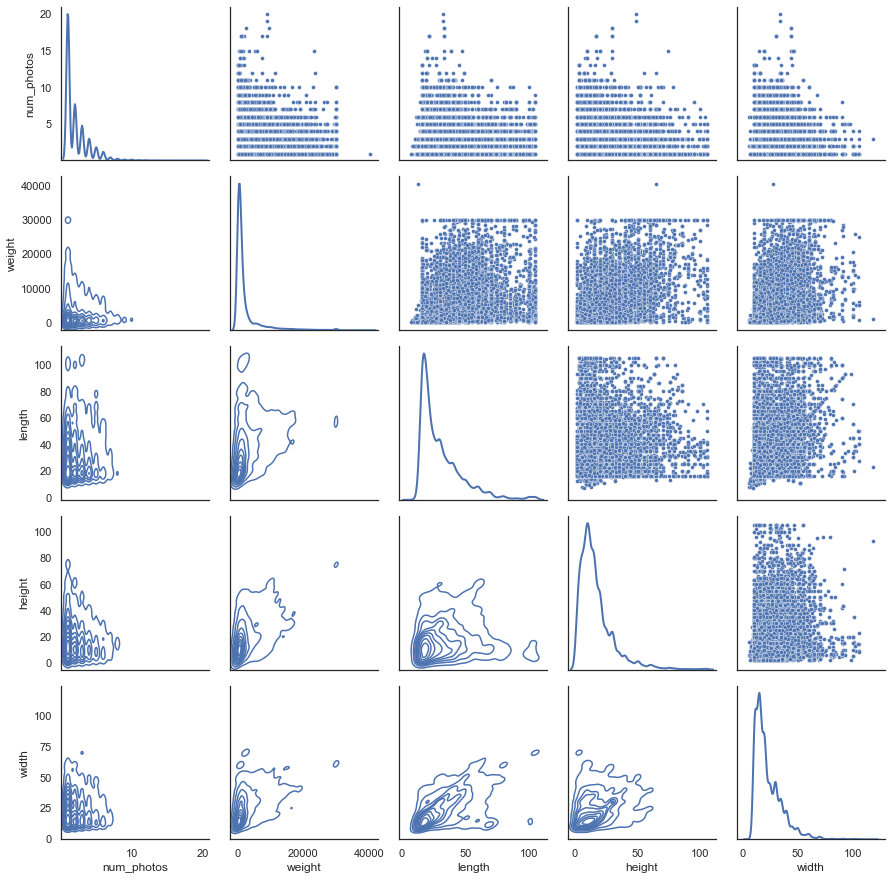

In [24]:
# Pair Grid
plt.figure(figsize=(15,8))
g = sns.PairGrid(products, diag_sharey=False, )
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

There appears to be no real clear relations between the product dimensions. Let's Further explore this with a Correlation Heatmap:

<AxesSubplot:>

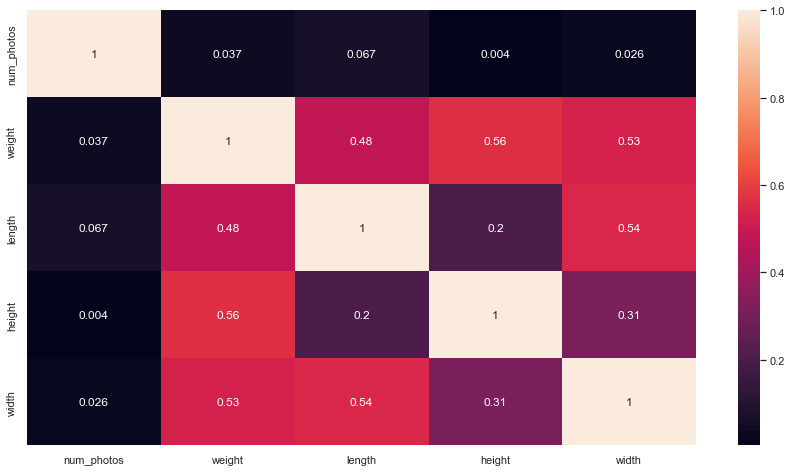

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(products.corr(), annot=True)

## Questions to Answer

### By Product Category

#### Amount of Products
Which Category contains the most amount of available products?

In [26]:
category_size =  products['category_en'].value_counts()
category_size

bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
fashion_childrens_clothes       5
home_comfort_2                  5
pc_gamer                        3
security_and_services           2
cds_dvds_musicals               1
Name: category_en, Length: 74, dtype: int64

#### Amount of Purchases
Which Category has the most amount of pruchases?

In [27]:
category_purchases = df['category_en'].value_counts()
category_purchases

bed_bath_table               11115
health_beauty                 9670
sports_leisure                8641
furniture_decor               8334
computers_accessories         7827
                             ...  
la_cuisine                      14
cds_dvds_musicals               14
pc_gamer                         9
fashion_childrens_clothes        8
security_and_services            2
Name: category_en, Length: 74, dtype: int64

#### Category Revenue
Which category generates the most amount of revenue?

In [28]:
category_revenue = df.groupby('category_en')['price'].sum().sort_values(ascending=False)
category_revenue

category_en
health_beauty                1258681.34
watches_gifts                1205005.68
bed_bath_table               1036988.68
sports_leisure                988048.97
computers_accessories         911954.32
                                ...    
flowers                         1110.04
home_comfort_2                   760.27
cds_dvds_musicals                730.00
fashion_childrens_clothes        569.85
security_and_services            283.29
Name: price, Length: 74, dtype: float64

### Products

#### Amount Sold
Which Product has sold the most amount of times?

In [29]:
product_purchases = df['product_id'].value_counts()
product_purchases

aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
7da0fe244c4f894b5f41cbf240b1e484      1
cce2229eda675cb0cb95616917bbb34b      1
5299e0a0336b5839e2a0ccb0d3d589d1      1
52a741f089f5c67d5c648e8437fdf22a      1
106392145fca363410d287a815be6de4      1
Name: product_id, Length: 32951, dtype: int64

<AxesSubplot:>

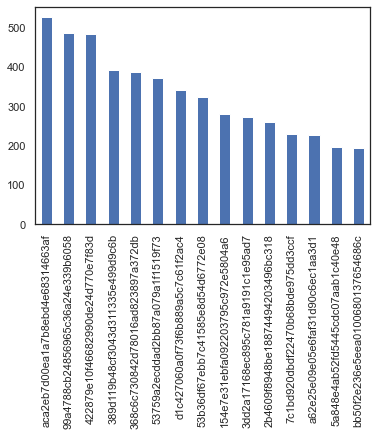

In [30]:
# Plot top 15
product_purchases[:15].plot(kind='bar')

By grouping by the `product_id` we can create a table that shows how many times each product appeared in the dataframe (number of times it was sold).

#### Product Revenue
Which products produced the most amount of revenue?

In [31]:
product_revenue = df.groupby('product_id')['price'].sum().sort_values(ascending=False)
product_revenue

product_id
bb50f2e236e5eea0100680137654686c    63885.00
6cdd53843498f92890544667809f1595    54730.20
d6160fb7873f184099d9bc95e30376af    48899.34
d1c427060a0f73f6b889a5c7c61f2ac4    47214.51
99a4788cb24856965c36a24e339b6058    43025.56
                                      ...   
2e8316b31db34314f393806fd7b6e185        2.99
680cc8535be7cc69544238c1d6a83fe8        2.90
8a3254bee785a526d548a81a9bc3c9be        2.55
310dc32058903b6416c71faff132df9e        2.29
46fce52cef5caa7cc225a5531c946c8b        2.20
Name: price, Length: 32951, dtype: float64

<AxesSubplot:xlabel='product_id'>

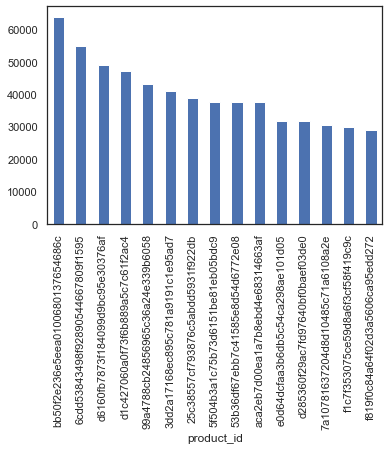

In [32]:
# Plot top 15
product_revenue[:15].plot(kind='bar')

## Creating Clean DataFrames
I want to Create a clean `products` DataFrame that contains information that may be useful in the future. I will then save this DataFrame for use with other analysis.

In [33]:
# Getting the cheapest listing for each price
cheapest_price = df[['product_id', 'price']].sort_values('price').drop_duplicates(subset=['product_id'], keep='first')
cheapest_price

,product_id,price
29610,8a3254bee785a526d548a81a9bc3c9be,0.85
55905,05b515fdc76e888aada3c6d66c201dff,1.20
9328,270516a3f41dc035aa87d220228f844c,1.20
34897,46fce52cef5caa7cc225a5531c946c8b,2.20
22861,310dc32058903b6416c71faff132df9e,2.29
...,...,...
32232,c3ed642d592594bb648ff4a04cee2747,4690.00
71835,a6492cc69376c469ab6f61d8f44de961,4799.00
49503,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
73922,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00


In [34]:
# Getting Max price of each product
max_price = df[['product_id', 'price']].sort_values('price').drop_duplicates(subset=['product_id'], keep='last')
max_price

,product_id,price
29608,8a3254bee785a526d548a81a9bc3c9be,0.85
55902,05b515fdc76e888aada3c6d66c201dff,1.20
9324,270516a3f41dc035aa87d220228f844c,1.20
34897,46fce52cef5caa7cc225a5531c946c8b,2.20
22861,310dc32058903b6416c71faff132df9e,2.29
...,...,...
32232,c3ed642d592594bb648ff4a04cee2747,4690.00
71835,a6492cc69376c469ab6f61d8f44de961,4799.00
49503,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
73922,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00


In [35]:
# Getting Average Price
avg_price = df.groupby('product_id')['price'].mean().to_frame().reset_index()
avg_price

,product_id,price
0,00066f42aeeb9f3007548bb9d3f33c38,101.65
1,00088930e925c41fd95ebfe695fd2655,129.90
2,0009406fd7479715e4bef61dd91f2462,229.00
3,000b8f95fcb9e0096488278317764d19,58.90
4,000d9be29b5207b54e86aa1b1ac54872,199.00
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,114.99
32947,fff81cc3158d2725c0655ab9ba0f712c,90.00
32948,fff9553ac224cec9d15d49f5a263411f,32.00
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,33.99


In [36]:
products = pd.merge(products, product_purchases.to_frame(), left_on='product_id', right_index=True).drop(columns='product_id_x').rename(columns={'product_id_y':'amnt_sold'})
products = pd.merge(products, product_revenue.to_frame(), left_on='product_id', right_index=True).rename(columns={'price':'revenue'})
products = pd.merge(products, cheapest_price, on='product_id').rename(columns={'price':'min_price'})
products = pd.merge(products, max_price, on='product_id').rename(columns={'price':'max_price'})
products = pd.merge(products, avg_price, on='product_id').rename(columns={'price':'avg_price'})

In [37]:
products

,product_id,num_photos,weight,length,height,width,category_en,amnt_sold,revenue,min_price,max_price,avg_price
0,1e9e8ef04dbcff4541ed26657ea517e5,1.0,225.0,16.0,10.0,14.0,perfumery,1,10.91,10.91,10.91,10.910000
1,3aa071139cb16b67ca9e5dea641aaa2f,1.0,1000.0,30.0,18.0,20.0,art,1,248.00,248.00,248.00,248.000000
2,96bd76ec8810374ed1b65e291975717f,1.0,154.0,18.0,9.0,15.0,sports_leisure,1,79.80,79.80,79.80,79.800000
3,cef67bcfe19066a932b7673e239eb23d,1.0,371.0,26.0,4.0,26.0,baby,1,112.30,112.30,112.30,112.300000
4,9dc1a7de274444849c219cff195d0b71,4.0,625.0,20.0,17.0,13.0,housewares,1,37.90,37.90,37.90,37.900000
...,...,...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,2.0,12300.0,40.0,40.0,40.0,furniture_decor,33,2306.70,69.90,69.90,69.900000
32947,bf4538d88321d0fd4412a93c974510e6,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights,2,400.00,160.00,240.00,200.000000
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,1.0,1400.0,27.0,7.0,27.0,bed_bath_table,5,636.50,127.00,127.50,127.300000
32949,83808703fc0706a22e264b9d75f04a2e,2.0,700.0,31.0,13.0,20.0,computers_accessories,7,228.92,29.90,39.71,32.702857


In [38]:
import os.path # for checking if file exists
# Save DataFrame
if not os.path.exists('../data/clean/products_clean.csv'): # only save if not already there
    products.to_csv('../data/clean/products_clean.csv',index=False)
else:
    print("File Already Exists")

File Already Exists


## Reexploring Clean Data (Now has more information)

<AxesSubplot:>

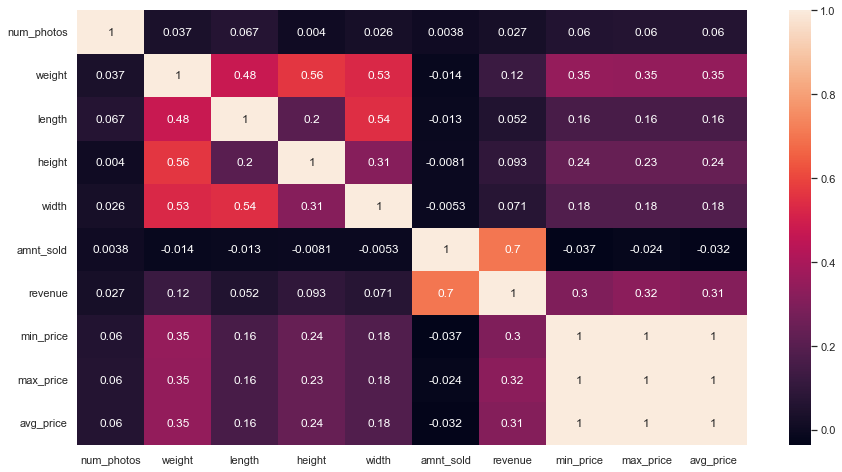

In [46]:
# Correlation Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(products.corr(), annot=True)

<AxesSubplot:xlabel='amnt_sold', ylabel='Count'>

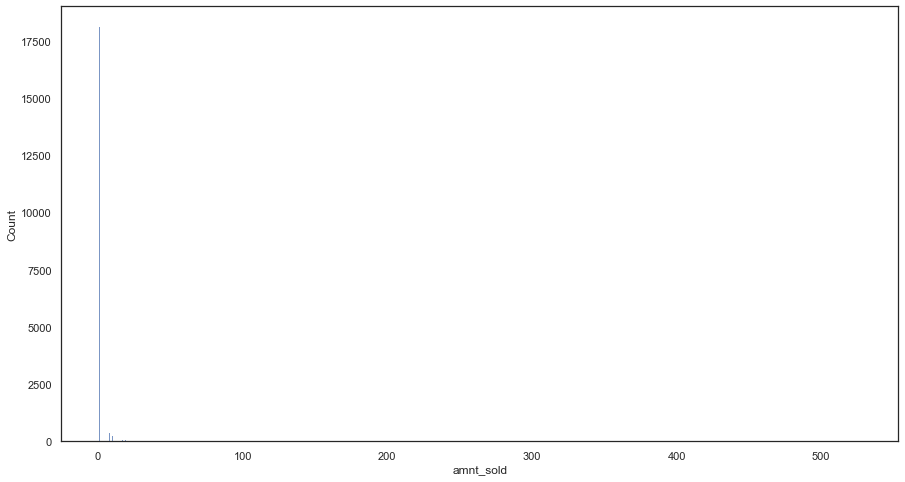

In [53]:
# Checking Distribution of the Amount Sold
plt.figure(figsize=(15,8))
sns.histplot(products['amnt_sold'])

In [54]:
# Checking how many of each amount sold
products['amnt_sold'].value_counts()

1      18117
2       5817
3       2651
4       1534
5        994
       ...  
109        1
150        1
484        1
169        1
373        1
Name: amnt_sold, Length: 138, dtype: int64

Wow, 18,117 products have only sold once. Considering that the store is so saturated with products, I would consider removing these products so that customers can more easily find the products that will actually sell and generate revenue. 

I will consider this information when further tweaking my recommendation system. 